In [3]:
import numpy as np

import torch
from torchvision.transforms import ToTensor

from convolutional_model1 import ConvolutionalModel1
from convolutional_model2 import ConvolutionalModel2
from emotionDetectionDataset import EmotionDetectionDataset
from torch_train import *
from torchvision import transforms


In [17]:
from matplotlib import pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.tight_layout()

In [4]:
ROOT_PATH = 'dataset'
MODEL_SAVE_PATH = './models/model.pth'
config = {'max_epochs': 60, 'batch_size': 64, 'weight_decay': 0.01, 'lr': 0.001}

TRAIN_VAL_SPLIT = 0.75

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

In [12]:
train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=ToTensor())

In [13]:
train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)

In [14]:
model = ConvolutionalModel1().to(device)

In [ ]:
# ucitavanje saveanog modela
model.load_state_dict(torch.load('./models/model.pth'))

In [15]:
history = train_torch_model(model, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True, model_save_path=MODEL_SAVE_PATH)

Epoch 0, train loss=0.026398753747344017, train accuracy=0.3197101987739179
Epoch 0, validation loss=0.02367955818772316, validation accuracy=0.4212066322976174
Epoch 1, train loss=0.022533932700753212, train accuracy=0.44900613041055176
Epoch 1, validation loss=0.02244543470442295, validation accuracy=0.4441967395847847
Epoch 2, train loss=0.021785270422697067, train accuracy=0.4666078394947056
Epoch 2, validation loss=0.020990043878555298, validation accuracy=0.4907342900933538
Epoch 3, train loss=0.02135845273733139, train accuracy=0.4757105703139513
Epoch 3, validation loss=0.02110707201063633, validation accuracy=0.4956109795179044
Epoch 4, train loss=0.021041380241513252, train accuracy=0.488296488946684
Epoch 4, validation loss=0.021050307899713516, validation accuracy=0.4936603037480842
Epoch 5, train loss=0.02089082822203636, train accuracy=0.4944733420026008
Epoch 5, validation loss=0.01996912807226181, validation accuracy=0.5110770516929078
Epoch 6, train loss=0.020678216591

In [ ]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model, test_data_loader, labels=labels, device=device)

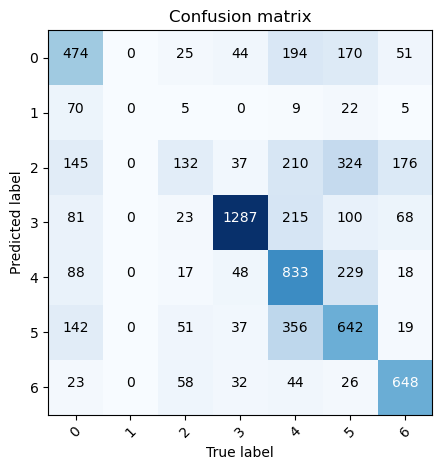

In [18]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=train.labels_and_classes)

In [18]:
precision_and_recall

array([[0.50211416, 0.49582463],
       [       nan, 0.        ],
       [0.41555556, 0.18261719],
       [0.81884464, 0.82299887],
       [0.55007825, 0.5701541 ],
       [0.43013857, 0.59743384],
       [0.66228514, 0.78820698]])

In [20]:

ROOT_PATH = 'dataset'
MODEL_SAVE_PATH = './models/model2.pth'
config = {'max_epochs': 60, 'batch_size': 64, 'weight_decay': 0.06, 'lr': 0.0001}

TRAIN_VAL_SPLIT = 0.8

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


train, test = EmotionDetectionDataset(root=ROOT_PATH, train=True, transform=transform), EmotionDetectionDataset(
    root=ROOT_PATH, train=False, transform=transforms.ToTensor())

train_data_loader, val_data_loader, test_data_loader = prepare_dataset(train, test, config['batch_size'],
                                                                       train_val_split=TRAIN_VAL_SPLIT)

model2 = ConvolutionalModel2().to(device)

In [21]:
model2.load_state_dict(torch.load('models/model2.pth'))

<All keys matched successfully>

In [ ]:
history = train_torch_model(model2, train_data_loader, val_data_loader, config, device=device, write_to_tensorboard=True,
                            model_save_path=MODEL_SAVE_PATH)

In [ ]:
labels = list(train.labels_and_classes.keys())
confusion_matrix, precision_and_recall = evaluate_model(model2, test_data_loader, labels=labels, device=device)

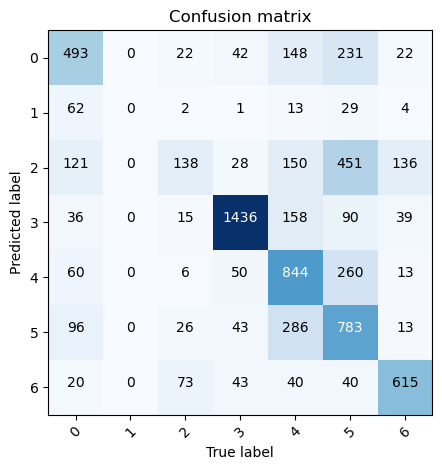

In [23]:
plot_confusion_matrix(confusion_matrix.astype(np.int32), classes=train.labels_and_classes)

In [24]:
precision_and_recall

array([[0.55518018, 0.51461378],
       [       nan, 0.        ],
       [0.4893617 , 0.13476562],
       [0.87401096, 0.80947012],
       [0.51494814, 0.68450933],
       [0.4156051 , 0.62790698],
       [0.7304038 , 0.7400722 ]])